# LogisticMap2

探索映射$x_{n} +1=\lambda x_{n} e^{-x_{n}} ,x>0,\lambda >0$。计算不同$\lambda$下的李雅普诺夫指数，寻找周期轨道和混沌轨道，展示其动力学演化过程。

### 李雅普诺夫指数 (Liapunov Exponent)

定义：李雅普诺夫指数刻画系统相空间任意一条微扰的轨道以何种方式偏离原轨道。我们任意选择两条靠得很近的轨道，它们的初始状态分别为：$x_{0}$和$x_{0}$+$\delta x_{0} $，迭代$n$次后，系统状态分别为$x_{n}$和$x_{n}$+$\delta x_{n} $。定义李雅普诺夫指数$\lambda$，满足如下等式：

$$|\delta x_{n} |=|\delta x_{0}|e^{\lambda n} $$

两边取自然对数得：

$$\lambda =\frac{1}{n} ln|\frac{\delta x_{n} }{\delta x_{0} }  |$$

换一种更稳定的算法

$$\lambda =\frac{1}{n} ln|\frac{\delta x_{n} }{\delta x_{0} }  |$$

$$\lambda=\frac{1}{n} ln|\frac{f^{n}(x_{0}+\delta x_{0}  )- f^{n}(x_{0}  ) }{\delta x_{0} }  |$$

$$\lambda =\frac{1}{n} ln|(f^{n})^{'}(x_{0} )   |$$

$$\lambda =\frac{1}{n} ln|\prod_{i=0}^{n-1} f^{'}(x_{i} )   |$$

$$\lambda =\frac{1}{n} \sum_{i=0}^{n-1} ln|f^{'}(x_{i} )   |$$

## —————————————————————目录—————————————————————

<font face="华文行楷" size=5>这次作业写了好久，希望老师能耐心看完</font>

-------------------------------------------------**QAQ**

### 由于本次作业内容较多，故分成三种颜色，代表三个专题$$$$**<font color=green>作业内容 1.分叉图，循环规律，和李雅普诺夫指数**——交互式操作 / 探索李雅普诺夫指数分布规律<font/>$$$$**<font color=blue>作业内容 2.寻找其周期轨道和混沌轨道**——周期一轨道，周期二轨道中临界值的计算 / 超越方程求数值解<font/>$$$$**<font color=orange>作业内容 3.探究临界慢化**——蛛网图的运用 / 临界慢化现象的解释**<font/>$$$$<font color=red>作业内容 4.附录**——特别鸣谢<font/>

$$$$

$$$$

## <font color=green> —————————————————我是一条分割线—————————————————————

### <font color=green>作业内容 1.分叉图，循环规律，和李雅普诺夫指数

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipd

In [2]:
#这个是绘制分叉图，李雅普诺夫指数和迭代图的代码
r1 = ipd.FloatSlider( #拖动条
    value=0,
    min=0,
    max=50,
    step=0.01,
    description="r的值的设定",
    disabled=False
)

In [3]:
#这个是绘制分叉图，李雅普诺夫指数和迭代图的代码
def main(r1,x):
    r=np.arange(0.1,50,0.1)
    df=np.zeros(np.size(r))
    plt.figure(figsize=(20,10),dpi=50)#设置大小及像素
    for i in range(200):
        x=r*x*np.exp(-x)
        df=np.log(abs(r*np.exp(-x)*(1-x)))+df
        if i >= 100: #200次之后开始计
            #plt.plot(r,x,',g',linewidth=0.1)
            plt.subplot(1, 2, 1)
            plt.title("分叉图与李雅普诺夫指数\n",fontsize=25)
            plt.rcParams['font.sans-serif'] = 'SimHei'#坐标轴正常显示中文
            plt.rcParams['axes.unicode_minus']=False 
            plt.rcParams['xtick.labelsize']=15 #x轴标签大小
            plt.rcParams['ytick.labelsize']=15
            plt.xlabel("r1",fontsize=20)# 坐标轴标签字体大小
            plt.ylabel("多次循环稳定后的 X",fontsize=20)
            plt.plot(r,x,'r,')
            plt.plot([0,50],[0,0],c='g')
            #plt.plot(r,x,',k',alpha=0.5)
    y=df/200 #200是总迭代次数n
    plt.subplot(1, 2, 1)
    plt.plot(r,y,'b',label="first")
    plt.plot((r1,r1),(-5,20),c='y')

    a1=np.zeros((100))
    j=0
    a1[0]=20
    while j<99:
        a1[j+1]=r1*a1[j]*np.exp(-a1[j])
        j=j+1
    b1=range(0,100,1)
    plt.subplot(1, 2, 2)
    plt.title(f"r = {r1},迭代n次后，X的值\n",fontsize=25)
    
    plt.rcParams['xtick.labelsize']=15 #x轴标签大小
    plt.rcParams['ytick.labelsize']=15
    plt.xlabel("迭代次数n",fontsize=20)
    plt.ylabel("X",fontsize=20)
    plt.plot(b1,a1,'g')
    print('               点击开始键即可观看，这是不同r的取值下，n与x的关系图')
ipd.interact_manual(main,r1=r1,x=[20,500])

interactive(children=(FloatSlider(value=0.0, description='r的值的设定', max=50.0, step=0.01), Dropdown(description=…

<function __main__.main(r1, x)>

左图中，<font color=red>红色线</font>是分叉图，<font color=blue>蓝色线</font>是**李雅普诺夫指数**随r的变化，<font color=orange>黄色线</font>是r的取值；右图中，是当r取到某个值的时候，x的迭代情况。

 <font color=green>可以观察到有以下循环规律：

> <font color=green>1.李雅普诺夫指数<0,分叉图具有周期性；李雅普诺夫指数>0,分叉图是混沌状态

> <font color=green>2.李雅普诺夫指数在**周期轨道交换**的情况下，会无限趋近于0

> <font color=green>3.这个迭代式中，x的取值也没有规定，我们令初值$x=500$时，会发现分叉图前期的单周期处于混乱状态，这是因为达到不动点要求的步数变多了，我们原来给出的步数不足以满足其需要步数，此时李雅普诺夫指数也会呈现全混沌状态

## <font color=blue> —————————————————我也是一条分割线————————————————————

### <font color=blue>作业内容 2.寻找其周期轨道和混沌轨道

#### <font color=blue>1.寻找周期一轨道(一阶不动点)

><font color=blue>下面是计算过程：

>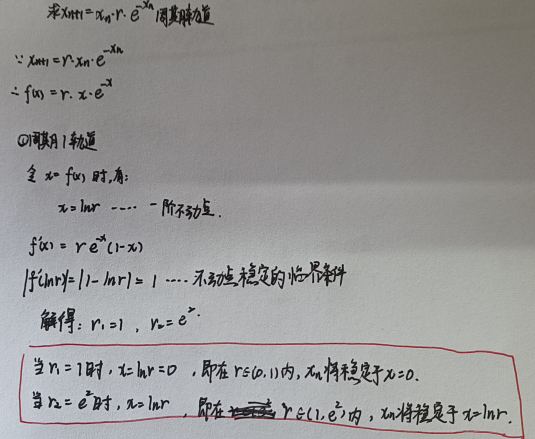

><font color=blue>下面是通过sympy库实现的计算过程:

In [4]:
#这个是求解周期一轨道，并且分析其稳定性的代码
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipd

x,r=sy.symbols('x r')
f=r*x*sy.exp(-x)#一阶不动点
ff=r*f*sy.exp(-f)

#求解一阶不动点
X1=sy.solve(f-x,x) #自动等于0，求解一阶不动点
df=r*sy.exp(-x)*(1-x)#一阶函数的斜率
#稳定性求解，绝对值等于1的时候时稳定性零界点
df_lnr=r*sy.exp(-sy.log(r))*(1-sy.log(r))#不动点lnr处的，一阶函数的斜率，令其等于|1|的时候为临界，由图可知，等于-1
R1=sy.solve(df_lnr+1,r)
R2=sy.solve(df_lnr-1,r)#不动点0处的，一阶函数的斜率，令其等于|1|的时候为临界，由图可知，等于1
#下面为解出的结论
print("周期一轨道的不动点",X1)
print("在x=0时，令其斜率为1，可解出此时r的值为",R2)
print("在x=lnr时，令其斜率为-1，可解出此时r的值为",R1)
print("所以在0到e^2都是其周期一轨道：\n在r属于(0,1)的时候，x最终归于0；\n在r属于(1,e^2)的时候，x最终归于lnr")

周期一轨道的不动点 [0, log(r)]
在x=0时，令其斜率为1，可解出此时r的值为 [1]
在x=lnr时，令其斜率为-1，可解出此时r的值为 [exp(2)]
所以在0到e^2都是其周期一轨道：
在r属于(0,1)的时候，x最终归于0；
在r属于(1,e^2)的时候，x最终归于lnr


<font color=blue>**可以得到周期一轨道的结论：**

><font color=blue>1. 周期一轨道的不动点是 $x=0$ 和 $x=ln(r)$

><font color=blue>2. 在$x=0$时，令其斜率为1（稳定临界值），可解出此时$r=1$；在$x=lnr$时，令其斜率为-1（稳定临界值），可解出此时$r$的值为 $e^2$

>**<font color=blue>3.所以$r$在$(0,1)$区间内时，$x$将稳定于0；在$(1,e^2)$区间时，$x$将稳定于$lnr$ ($e^2=7.38906$)**

**——————————————————————————————————**

#### <font color=blue>2.寻找周期二轨道(二阶不动点)

In [5]:
#这个是求ff的导数并且化简的代码
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipd

x,r=sy.symbols('x r')
f=r*x*sy.exp(-x)#一阶不动点
ff=r*f*sy.exp(-f)#二阶不动点

#求解二阶不动点
#x*(1+r*sy.exp(-x))=2*sy.log(r)#二阶不动点满足的隐函数
dff=sy.simplify(sy.diff(ff,x))
print(dff)

r**2*(r*x**2 - r*x - x*exp(x) + exp(x))*exp(-x*(r*exp(-x) + 2))


><font color=blue>由于计算过程较为复杂、具有一定的技巧性，sympy需要实现我们所需要的运算流程更加麻烦，故选用笔和纸来计算

>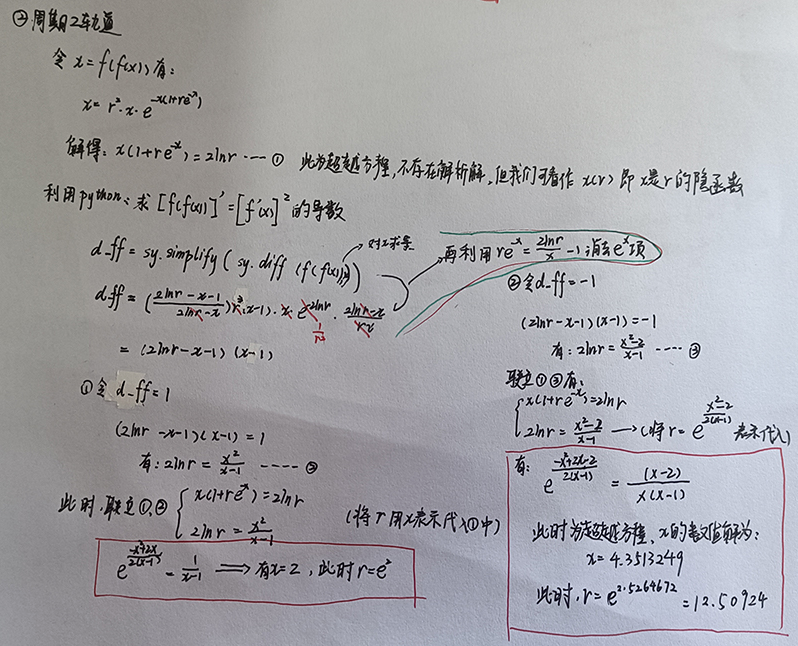

### <font color=blue>**通过计算可以发现周期二轨道具有以下规律：**

><font color=blue>**1.**周期二轨道的不动点没有解析解，但是$x$与$r$有以下关系 <font color=blue>$𝑥(1+𝑟𝑒^{-x})=2𝑙𝑛𝑟$</font>，每一个确定的$r$，都存在两个与之对应的$x$

><font color=blue>**2.**将$x$看作$r$的隐函数

>><font color=blue>代入斜率为±1（稳定临界值）的情况，可以解得当<font color=blue>$$$$$$x_{1} =2,r_{1} =e^{2} $$$$$$</font>$x$的另外一个解满足一个超越方程，其中$x$是此方程的解$$$$$$e^{\frac{-x^{2}+2x-2 }{2(x-1)} } -\frac{x-2}{x(x-1)}=0 $$$$$$且$r$满足$$$$$$2lnr=\frac{x^{2} -2}{x-1} $$$$$$</font><font color=blue>由于超越方程没有解析解，通过geogebra可以得到数值解(二分法代码无法运行...)

>>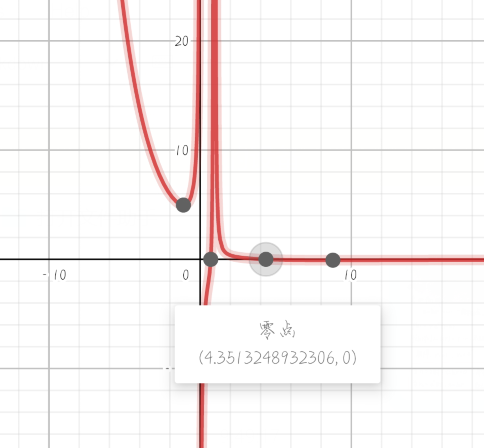

In [ ]:
#用二分法求x2数值解的代码(运行速度过慢)
'''
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipd
def func(x):
    return np.exp((1-x**2+2*x-2)/2*(x-1))-(x-2)/x*(x-1)
x1=3
x2=5
f1=func(x1)#x1=3
f2=func(x2)#x2=5
m=0
x0=0
while m<5:#迭代5次
    x0=(x1+x2)/2
    f0=func(x0)   
    if f1*f0<0:
        x2=x0
        f2=f0
        m=m+1
    elif f2*f0<0:
        x1=x0
        f1=f0
        m=m+1
print(x0,'是迭代',n,'次后求得的2022的9次方根')
'''

<font color=blue>所以有<font color=blue>$$$$$$x_{2}=4.31532,r_{2} =12.5902$$$$$$</font>

><font color=blue>**3.**所以，$r$在$(e^2,12.509)$区间时，$x$将处于周期二轨道,其将稳定在满足该关系的两个$x$值直接波动<font color=blue>$$$$$$𝑥(1+𝑟𝑒^{-x})=2𝑙𝑛𝑟$$$$$$</font>

<font color=blue>**3.周期三，四轨道探索待定**

## <font color=orange> ——————————————————我还是一条分割线———————————————————

### <font color=orange>作业内容 3.探究临界慢化

#### <font color=orange>1.临界慢化的直观体现

>**<font color=orange>(1)蛛网图**

In [7]:
#蛛网图的代码
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipd

def main(r的值,迭代次数n,初值x0):
    r=r的值
    n=迭代次数n
    x0=初值x0
    x=np.arange(0,20,0.1)
    y=r*x*np.exp(-x)
    plt.figure(figsize=(5,5))
    plt.xlim(0,r)
    plt.ylim(0,r)
    plt.plot(x,y)
    plt.plot(x,x)
    plt.plot([0,r+2],[0,0]) 
    xx0=0
    y0=0
    plt.scatter(x0,r*x0*np.exp(-x0),c='y',s=60)
    for i in range(n):
        plt.plot([y0,r*y0*np.exp(-y0)],[r*y0*np.exp(-y0),r*y0*np.exp(-y0)],'g',linewidth=0.5)
        y0=r*x0*np.exp(-x0)
        plt.plot([x0,y0],[y0,y0],'g',linewidth=0.5)
        plt.plot([y0,y0],[y0,r*y0*np.exp(-y0)],'g',linewidth=0.5)
        x0=y0
    plt.scatter(y0,r*y0*np.exp(-y0),c='r',linewidth=0.5)
        
ipd.interact(   #ipd.interact_manual是点击开始才开始的意思,ipd.interact是直接开始的意思
    main,
    r的值=ipd.FloatSlider(min=0, max=20, step=0.01, value=7.2, readout_format='.2f',description='r的值:'),
    迭代次数n=ipd.Play(min=0, max=500, step=1, value=0,description='迭代次数:'),
    初值x0=[0.2,5]
)

interactive(children=(FloatSlider(value=7.2, description='r的值:', max=20.0, step=0.01), Play(value=0, descripti…

<function __main__.main(r的值, 迭代次数n, 初值x0)>

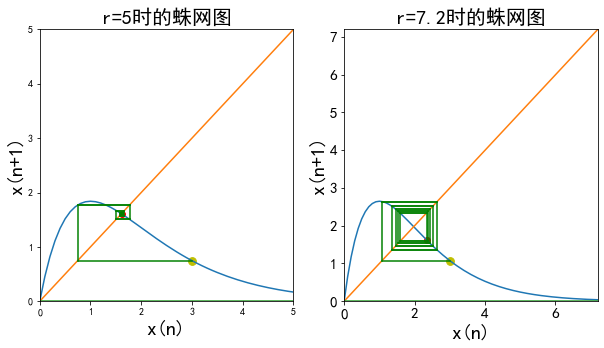

In [2]:
#蛛网图对比图的代码
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipd

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("r=5时的蛛网图",fontsize=20)
plt.rcParams['font.sans-serif'] = 'SimHei'#坐标轴正常显示中文
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams['xtick.labelsize']=15 #x轴标签大小
plt.rcParams['ytick.labelsize']=15
plt.xlabel("x(n)",fontsize=20)# 坐标轴标签字体大小
plt.ylabel("x(n+1)",fontsize=20)
r=5
x0=3
n=10
x=np.arange(0,20,0.1)
y=r*x*np.exp(-x)
plt.xlim(0,r)
plt.ylim(0,r)
plt.plot(x,y)
plt.plot(x,x)
plt.plot([0,r+2],[0,0]) 
xx0=0
y0=0
plt.scatter(x0,r*x0*np.exp(-x0),c='y',s=60)
for i in range(n):
    plt.plot([y0,r*y0*np.exp(-y0)],[r*y0*np.exp(-y0),r*y0*np.exp(-y0)],'g')
    y0=r*x0*np.exp(-x0)
    plt.plot([x0,y0],[y0,y0],'g')
    plt.plot([y0,y0],[y0,r*y0*np.exp(-y0)],'g')
    x0=y0
plt.scatter(y0,r*y0*np.exp(-y0),c='r')
#----------------------------------------------------------------------
plt.subplot(1,2,2)
plt.title("r=7.2时的蛛网图",fontsize=20)
plt.rcParams['font.sans-serif'] = 'SimHei'#坐标轴正常显示中文
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams['xtick.labelsize']=15 #x轴标签大小
plt.rcParams['ytick.labelsize']=15
plt.xlabel("x(n)",fontsize=20)# 坐标轴标签字体大小
plt.ylabel("x(n+1)",fontsize=20)
r=7.2
x0=3
n=10
x=np.arange(0,20,0.1)
y=r*x*np.exp(-x)
plt.xlim(0,r)
plt.ylim(0,r)
plt.plot(x,y)
plt.plot(x,x)
plt.plot([0,r+2],[0,0]) 
xx0=0
y0=0
plt.scatter(x0,r*x0*np.exp(-x0),c='y',s=60)
for i in range(n):
    plt.plot([y0,r*y0*np.exp(-y0)],[r*y0*np.exp(-y0),r*y0*np.exp(-y0)],'g')
    y0=r*x0*np.exp(-x0)
    plt.plot([x0,y0],[y0,y0],'g')
    plt.plot([y0,y0],[y0,r*y0*np.exp(-y0)],'g')
    x0=y0
plt.scatter(y0,r*y0*np.exp(-y0),c='r')
plt.show()

>><font color=orange>上图是不同的$r$迭代20次蛛网图$$$$$r$=5与$r$=7.8都属于区间$(1,e^2)$，都是其周期一轨道，但是由于$r=7.8$更靠近临界$e^2$所以收敛的速度明显慢于$r=5$，这种现象称为**临界慢化**

>**<font color=orange>(2)分叉图**

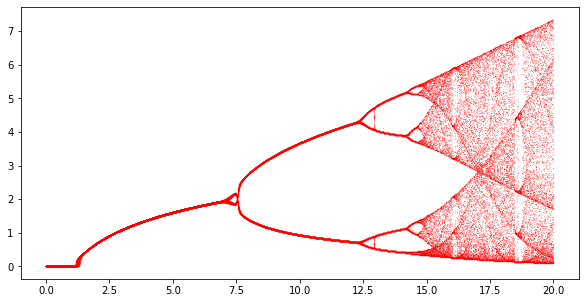

In [1]:
#在分叉图中的临界慢化的体现
import matplotlib.pyplot as plt
import numpy as np

r = np.arange(0,20,0.01)
x = 20  # 初值
plt.figure(figsize=(10,5))
for i in range(100): #全部计算次数
    x = r*x*np.exp( - x)
    if i >= 50: #100次之后开始计
        #plt.plot(r,x,',g',linewidth=0.1)
        plt.scatter(r,x,c='r',s=0.01)
        #plt.plot(r,x,',k',alpha=0.05)
plt.show()

><font color=orange>在周期一至周期二轨道的交界处，出现了一些本不该存在的点，那是由于其收敛速度变慢，计算次数不够，点还未稳定时便开始画图，出现了这些现象

#### <font color=orange>2.临界慢化的原因探究

><font color=orange>我们知道，临界的时候即是$f^{'} (x)=1$的时候，在我们前面不动点的稳定性分析可以得知，存在 <font color=red>$$$$$$f^{'} (x)=\frac{\delta _{n+1} }{\delta _{n} } $$$$$$ </font>其中$\delta _{n}$是$x_{n} $距离不动点的微小偏移量；而$\delta _{n+1}$是$x_{n+1} $距离不动点的微小偏移量。$$$$而当$f^{'} (x)$越接近于1（临界值）的时候，那么偏移量的变化就越小，也就是接近x的速度就越慢 <font color=red>$$$$$$\delta _{n+1} -\delta _{n} =(1-f^{'}(x) )\delta _{n}$$$$$$</font>这就是临界慢化的本质原因

## <font color=red> —————————————————————附录—————————————————————

## 特别鸣谢&#x1F339;:翟家辉同学的动画和emoji表情包指导

## 特别鸣谢&#x1F339;:吴本畅同学和我倾情讨论

In [ ]:
#f与ff函数图像可视化的代码
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipd

def main(r):
    x=np.arange(0,20,0.1)
    y=r*x*np.exp(-x)
    yy=r*r*x*np.exp(-x-r*x*np.exp(-x))
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.title("x=f(x)\n",fontsize=25)
    plt.rcParams['font.sans-serif'] = 'SimHei'#坐标轴正常显示中文
    plt.rcParams['xtick.labelsize']=15 #x轴标签大小
    plt.rcParams['ytick.labelsize']=15
    plt.xlabel("x(n)",fontsize=20)# 坐标轴标签字体大小
    plt.ylabel("x(n+1)",fontsize=20)
    plt.xlim(0,r+2)
    plt.ylim(-2,r+2)
    plt.plot(x,x)
    plt.plot(x,y)
    plt.plot([0,r+2],[0,0])
    plt.scatter(np.log(r),np.log(r),c='g')
    k1=r*np.exp(-np.log(r))*(1-np.log(r))
    k2=r
    print("左图中")
    print("此时交点(0,0)处斜率斜率为",k2)
    print("此时交点(lnr,lnr)处斜率斜率为",k1)
    print("r=1，为分周期一轨道分界点")
    print("r=e^2=7.3891，为分周期二轨道分界点")
    plt.subplot(1, 2, 2)
    plt.title("x=f(f(x))\n",fontsize=25)
    plt.rcParams['font.sans-serif'] = 'SimHei'#坐标轴正常显示中文
    plt.rcParams['xtick.labelsize']=15 #x轴标签大小
    plt.rcParams['ytick.labelsize']=15
    plt.xlabel("x(n)",fontsize=20)# 坐标轴标签字体大小
    plt.ylabel("x(n+2)",fontsize=20)
    plt.plot(x,yy)
    plt.xlim(0,r)
    plt.ylim(-2,r)
    plt.plot(x,x)
    plt.plot([0,2*r],[0,0])
ipd.interact_manual(main,
    r=(0.1,50,0.01)
)